# Lectura 1: Evaluación de modelos
## Aplicaciones de Minería de Datos I
### Septiembre, 2023

<p>Uno de los pasos cruciales en Inteligencia Artificial es estimar el desempeño de los modelos, mediante datos no observados y aleatorios.</p>

<p>Para poder observar la balanza sesgo-varianza, se necesita evaluar el modelo de manera más específica.</p>

<p>Existen dos métodos denominados <b>holdout cross-validation</b> y <b>k-fold cross-validation</b>,que ayudan a obtener estimaciones más acertadas del error generalizado del modelo, esto es, qué tan bien se desempeña el modelo con datos no observados o aleatorios.</p>

### Holdout cross-validation

<p>El método de <b>holdout cross-validation</b> divide el conjunto de datos inicial en dos subconjuntos de entrenamiento y prueba; el primero como se ha realizado en lecturas pasadas, sirve para el entrenamiento del algoritmo de clasificación y el segundo, para estimar el desempeño del modelo resultante.</p>

<p>Aún así, en una aplicación típica de aprendizaje automático, es de suma importancia mejorar y comprar diferentes configuraciones del algoritmo para mejorar el desempeño cuando se evalúa el modelo con datos no observados.</p>

<p>El proceso anterior es denominado <b>selección del modelo</b>. Donde el término se define como:</p>

<center><i>El conjunto óptimo de valores que puedan ser aplicados a parámetros (hiper-parámetros) que mejoren el desempeño de clasificación.</i></center>

<p>Si se reutiliza el mismo conjunto de prueba de manera repetitiva y aleatoria para la selección del modelo, algunas muestras podrían formar parte del subconjunto de entrenamiento y el modelo podría generar un sobreajuste.</p>

<p>Una mejor forma de abordar la selección de modelos es separar los datos en tres subconjuntos:</p>

<ol>
<li>	Entrenamiento: entrenar el algoritmo de clasificación </li>
<li>	Validación: seleccionar el modelo </li>
<li>	Pruebas: evaluar el desempeño del modelo </li>
</ol>  

<p>En la siguiente Figura se describe a detalle el método de holdout</p>

![title](Lectura1-1.png)


### K-fold cross-validation

<ol>
    <li> Se divide de manera aleatoria el conjunto de entrenamiento en $k$ <i>pliegues</i> sin reemplazo, en donde $k-1$ <i>pliegues</i> son utilizados para el entrenamiento del modelo y uno más para la prueba. </li>
<li> El proceso se repite $k$ veces para obtener $k$ modelos y estimadores de desempeño. </li>
<li> La gran ventaja de este método es que cada muestra será parte del conjunto de entrenamiento o de prueba solamente una vez, lo cual ayuda al estimador a tener poca varianza a diferencia del método de holdout. En la siguiente figura se muestra un ejemplo con $10$ <i>pliegues</i>, $10$ iteraciones; $9$ pliegues para entrenamiento y $1$ para probar la evaluación del modelo. </li>
</ol>

![alt text](Lectura1-2.png "Title")

<p>El valor estándar de $k$, para aplicaciones típicas de aprendizaje máquina es $10$. Aún así, es recomendable aumentar el número de pliegues si se trabaja con conjuntos de datos pequeños. Si se aumenta el valor de $k$, más datos de entrenamiento serán utilizados en cada iteración, lo cual resulta en un menor sesgo en la estimación general del desempeño, haciendo un promedio de cada estimación individual del modelo.</p> 

<p>Una mejora de $k$ fold cross validation, contenida en la biblioteca <code>sklearn</code> de Python es recomendada mediante la clase <b>StratifiedKFold</b>, la cual, toma en cuenta la desproporción de muestras de clase y ayuda a balancear las estimaciones de sesgo-varianza.</p>

### Depurando algoritmos con aprendizaje y curvas de validación

<ol>
<li> Unas técnicas de diagnóstico muy efectivas para el desempeño de algoritmos de aprendizaje son las <b>curvas de aprendizaje y validación</b>.</li>
<li> El objetivo es diagnosticar oportunamente el sobre ajuste (alta varianza) y bajo ajuste (alto sesgo).</li>
<li> Si un modelo es muy complejo para un conjunto de entrenamiento existirán <i>muchos grados de libertad</i> en los parámetros de dicho modelo, el modelo tenderá a sobre ajustarse para el conjunto de datos y no se podrá generalizar para datos no observados.</li>
<li> Graficando el entrenamiento del modelo y la validación de las precisiones como funciones del tamaño del conjunto de entrenamiento se puede detectar fácilmente si el modelo sufre de <b>alta varianza</b> o <b>alto sesgo</b></li>

    
![alt text](Lectura1-3.png "Title")


<li> Las curvas de validación son una herramienta efectiva para mejorar el desempeño de un modelo cuando tiene problemas como sobre ajuste o bajo ajuste. </li>
<li> Dichas curvas se relacionan con las curvas de aprendizaje, pero en vez de graficar la precisión de entrenamiento y prueba en términos de su tamaño, se varían los parámetros del modelo, por ejemplo, los parámetros de regularización inversa de Regresión Logística y las MSV, o en su caso, la profundidad del un árbol de decisión.</li>
</ol>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, validation_curve, learning_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
dataset_uno = pd.read_csv('../datasets/CSDMC_API_Train.csv')
X_uno = dataset_uno['x']
y_uno = dataset_uno['y']
dataset_dos = pd.read_csv('../datasets/dataset_malwares.csv',sep=',')
y_dos = dataset_dos['Malware']
X_dos = dataset_dos.drop(columns=['Malware'])
X_dos = dataset_dos.drop(columns=['Name']) 

In [7]:
dataset_uno.head()

y                                                  x
0  1  LoadLibraryW HeapAlloc HeapAlloc HeapFree Heap...
1  1  RegOpenKeyExW LoadLibraryA GetProcAddress GetP...
2  1  HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
3  1  HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...
4  1  HeapAlloc HeapFree HeapAlloc HeapAlloc HeapFre...

In [8]:
dataset_dos.head()

Name  e_magic  e_cblp  e_cp  e_crlc  \
0  VirusShare_a878ba26000edaac5c98eff4432723b3    23117     144     3       0   
1  VirusShare_ef9130570fddc174b312b2047f5f4cf0    23117     144     3       0   
2  VirusShare_ef84cdeba22be72a69b198213dada81a    23117     144     3       0   
3  VirusShare_6bf3608e60ebc16cbcff6ed5467d469e    23117     144     3       0   
4  VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb    23117     144     3       0   

   e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  ...  SectionMaxChar  \
0          4           0       65535     0   184  ...      3758096608   
1          4           0       65535     0   184  ...      3791650880   
2          4           0       65535     0   184  ...      3221225536   
3          4           0       65535     0   184  ...      3224371328   
4          4           0       65535     0   184  ...      3227516992   

   SectionMainChar  DirectoryEntryImport  DirectoryEntryImportSize  \
0                0                     7                       152   
1                0                    16                       311   
2                0                     6                       176   
3                0                     8                       155   
4                0                     2                        43   

   DirectoryEntryExport  ImageDirectoryEntryExport  ImageDirectoryEntryImport  \
0                     0                          0                      54440   
1                     0                          0                     262276   
2                     0                          0                      36864   
3                     0                          0                     356352   
4                     0                          0                      61440   

   ImageDirectoryEntryResource  ImageDirectoryEntryException  \
0                        77824                         73728   
1                       294912                             0   
2                        40960                             0   
3                      1003520                             0   
4                        73728                             0   

   ImageDirectoryEntrySecurity  
0                            0  
1                       346112  
2                            0  
3                     14109472  
4                        90624  

[5 rows x 79 columns]

#### Generación de sunconjuntos de entrenamiento y prueba

In [9]:
X_train_uno,X_test_uno,y_train_uno,y_test_uno = train_test_split(X_uno,y_uno,test_size=.2)

In [12]:
#help(SVC)

#### Pruebas de modelos de la MSV con diferentes kernels
#### Primer conjunto de datos

In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#para cada kernel de la msv
for k in kernels:
    #crea un estimador con el kernel de cada iteración
    svm = SVC(kernel=k)
    #creo un estimador de transformción
    tfidf = TfidfVectorizer()
    #creo un objeto Pipeline
    vect_svm = Pipeline(steps=[('tfidf',tfidf),
                          ('sgd',svm)])
    #entrenar el estimador
    vect_svm.fit(X_train_uno,y_train_uno)
    #El predictor evaluará el accuracy
    print("Presicición con el kernel",k,":",vect_svm.score(X_test_uno,y_test_uno)*100)
    print()

Presicición con el kernel linear : 84.61538461538461

Presicición con el kernel poly : 87.17948717948718

Presicición con el kernel rbf : 84.61538461538461

Presicición con el kernel sigmoid : 79.48717948717949



#### Pruebas de modelos de la MSV con diferentes kernels
#### Segundo conjunto de datos

In [15]:
#Estimador de estandarización
scaler_z = StandardScaler()
#Crear conjunto estandarizado
X_scz = scaler_z.fit_transform(X_dos)
X_scz_df = pd.DataFrame(X_dos,columns=X_dos.columns)
X_scz_df.head()
X_train,X_test,y_train,y_test = train_test_split(X_scz,y_dos,test_size=.2)
svm = SVC()
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test)*100)

99.89803721641601


#### Pruebas mediante K-fold Cross-validation
#### Primer conjunto de datos

In [17]:
#guardar los modelos
modelos = []
#Estimador de KFOLD
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_uno)
cnt = 1
for train_indices,test_indices in kfold.split(X_uno):
    #dividir 10 veces el cojunto de entrnamiento y validación
    X_train,X_test = X_uno[train_indices],X_uno[test_indices]
    y_train,y_test = y_uno[train_indices],y_uno[test_indices]
    #Estimador de l SVM
    svm = SVC()
    tfidf = TfidfVectorizer()
    vect = Pipeline(steps=[('tfidf',tfidf),
                      ('sgd',svm)])
    vect.fit(X_train,y_train)
    modelos.append(vect)
    print("Presición","Modelo",cnt,vect.score(X_test,y_test)*100)
    cnt = cnt + 1 

Presición Modelo 1 89.74358974358975
Presición Modelo 2 84.61538461538461
Presición Modelo 3 87.17948717948718
Presición Modelo 4 89.74358974358975
Presición Modelo 5 74.35897435897436
Presición Modelo 6 82.05128205128204
Presición Modelo 7 94.87179487179486
Presición Modelo 8 79.48717948717949
Presición Modelo 9 89.47368421052632
Presición Modelo 10 89.47368421052632


In [27]:
#modelos[6].predict([X_test[0]])
modelos[6].predict([X_test.values[0]])

array([0])

#### Segundo conjunto de datos

In [30]:
modelos_dos = []
kfold = KFold(n_splits=10)
scaler_z = StandardScaler()

cnt  = 1
X_scz = scaler_z.fit_transform(X_dos)
kfold.get_n_splits(X_scz)
for train_indices,test_indices in kfold.split(X_scz):
    X_train,X_test = X_scz[train_indices],X_scz[test_indices]
    y_train,y_test = y_dos[train_indices],y_dos[test_indices]
    svm = SVC()
    svm.fit(X_train,y_train)
    modelos_dos.append(svm)
    print("Presición","Modelo",cnt, svm.score(X_test,y_test)*100)
    cnt = cnt + 1

Presición Modelo 1 100.0
Presición Modelo 2 99.89801121876593
Presición Modelo 3 100.0
Presición Modelo 4 99.79602243753187
Presición Modelo 5 99.89801121876593
Presición Modelo 6 100.0
Presición Modelo 7 99.94900560938297
Presición Modelo 8 99.74502804691484
Presición Modelo 9 99.54105048444671
Presición Modelo 10 99.49005609382968


In [37]:
#Reporte de clasificación con todas las clases
from sklearn.metrics import classification_report 

In [38]:
y_pred = modelos[6].predict(X_test_uno)

In [39]:
print(classification_report(y_pred,y_test_uno))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58         7
           1       1.00      0.86      0.92        71

    accuracy                           0.87        78
   macro avg       0.71      0.93      0.75        78
weighted avg       0.95      0.87      0.89        78



####  Stratified K-Fold con el segundo conjunto de datos

In [40]:
skf = StratifiedKFold(n_splits=4)
for n, (itrain, ival) in enumerate(skf.split(X_dos,y_dos)):
    print("Bucle",n+1)
    svm = SVC()
    svm.fit(X_dos.values[itrain],y_dos.values[itrain])
    y_pred = svm.predict(X_dos.values[ival])
    score = svm.score(X_dos.values[ival],y_dos.values[ival])
    print("Score [acc]",score*100,'%')

Bucle 1
Score [acc] 74.7297572914542 %
Bucle 2
Score [acc] 74.70936161533754 %
Bucle 3
Score [acc] 74.93371405262084 %
Bucle 4
Score [acc] 74.98980008159934 %


####  Stratified K-Fold con el primer conjunto de datos

In [41]:
vec_svm_tfidf = Pipeline([('vec',TfidfVectorizer()),('svm',SVC())])
vec_svm_tfidf.fit(X_train_uno,y_train_uno)

Pipeline(steps=[('vec', TfidfVectorizer()), ('svm', SVC())])

In [42]:
vec_svm_tfidf.score(X_test_uno,y_test_uno)*100

84.61538461538461

In [43]:
skf = StratifiedKFold(n_splits=4)
for n, (itrain, ival) in enumerate(skf.split(X_uno,y_uno)):
    print("Bucle",n+1)
    vec_svm_tfidf = Pipeline([('vec',TfidfVectorizer()),('svm',SVC())])
    vec_svm_tfidf.fit(X_uno.values[itrain],y_uno.values[itrain])
    y_pred = vec_svm_tfidf.predict(X_uno.values[ival])
    score = vec_svm_tfidf.score(X_uno.values[ival],y_uno.values[ival])
    print("Score [acc]",score*100,'%')

Bucle 1
Score [acc] 87.62886597938144 %
Bucle 2
Score [acc] 85.56701030927834 %
Bucle 3
Score [acc] 86.5979381443299 %
Bucle 4
Score [acc] 85.56701030927834 %


#### Graficar las curvas de aprendizaje y validación
#### Primer conjunto de datos

In [44]:
#Pipeline recibe una serie de pasos de estimador
vec_svm_tfidf = Pipeline([('vec',TfidfVectorizer()),
                          ('svm',SVC())])
#train_sizes el tamaño del conjunto de entrenamiento (conjunto de entrenamiento)
#train_scores desempeño durante el entrenamiento (conjunto de validación)
#test_scores desempeño final (conjunton de prueba)
train_sizes,train_scores,test_scores =learning_curve(vec_svm_tfidf,X_train_uno,y_train_uno)
train_mean = np.mean(train_scores, axis=1) #media del desempeño del conjunto de validación
train_std = np.std(train_scores, axis=1) #dev. est. del conjunto de validación 
test_mean = np.mean(test_scores, axis=1) #media del desempeño del conjunto de prueba
test_std = np.std(test_scores, axis=1) #dev. est. del conjunto de prueba 

In [45]:
### Gráfica

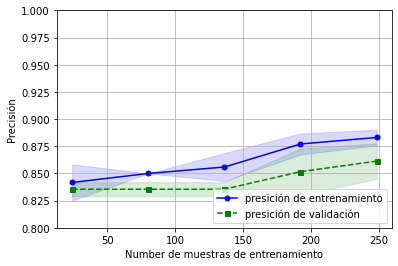

In [46]:
plt.plot(train_sizes, train_mean,
color='blue', marker='o',
markersize=5,
label='presición de entrenamiento')
plt.fill_between(train_sizes,
train_mean + train_std,
train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='presición de validación')
plt.fill_between(train_sizes,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

#### Medir la curva de validación mediante k-fold cross validation
#### Segundo conjunto de datos

In [47]:
X_train_dos,X_test_dos,y_train_dos,y_test_dos = train_test_split(X_dos,y_dos,test_size=.2)

In [48]:
vec = TfidfVectorizer()
X_vec = vec.fit_transform(X_uno)
X_train_uno,X_test_uno,y_train_uno,y_test_uno = train_test_split(X_vec,y_uno,test_size=.2)

In [49]:
X_train_uno.shape

(310, 313)

In [50]:
param_range = np.linspace(1,10,20)
#estimator = SVC()
train_scores,test_scores = validation_curve(
SVC(kernel="sigmoid"),
X_train_uno,
y_train_uno,
param_name='C',
 param_range=param_range,
    cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

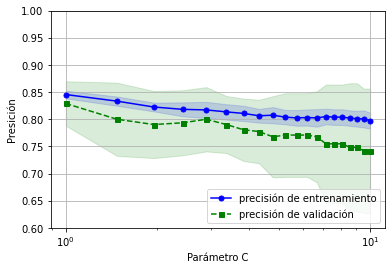

In [51]:
plt.plot(param_range, train_mean,
 color='blue', marker='o',
 markersize=5,
 label='precisión de entrenamiento')
plt.fill_between(param_range, train_mean + train_std,
 train_mean - train_std, alpha=0.15,
 color='blue')
plt.plot(param_range, test_mean,
 color='green', linestyle='--',
marker='s', markersize=5,
 label='precisión de validación')
plt.fill_between(param_range,
 test_mean + test_std,
 test_mean - test_std,
 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parámetro C')
plt.ylabel('Presición')
plt.ylim([0.6, 1.0])
plt.show()